<a href="https://colab.research.google.com/github/MohamedMadhoun/Prediction-of-Product-Sales/blob/main/prediction_of_product_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Prediction of Product Sales


- Author: Mohamed Madhoun

## Project Overview

##Part 1: Data Loading & Initial Exploration


In [19]:
import pandas as pd
fpath="/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB




```
# This is formatted as code
```

##  Part 2 : Data Cleaning



1) How many rows and columns?

In [21]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")


The dataset has 8523 rows and 12 columns.


2) What are the datatypes of each variable?



In [22]:
print(df.dtypes)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


3) Are there duplicates? If so, drop any duplicates.



In [23]:
duplicates = df[df.duplicated()]
print(f"There are {duplicates.shape[0]} duplicate rows.")

There are 0 duplicate rows.


4) Identify missing values.



In [24]:
print(df.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


5) Address the missing values by using a placeholder value.



In [25]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna("MISSING")
    else:
        df[col] = df[col].fillna(-1)
        ##df['Item_Weight'] = df['Item_Weight'].fillna(
       ## df.groupby('Item_Type')['Item_Weight'].transform('mean')


6) Confirm that there are no missing values after addressing them.



In [26]:
print(df.isnull().sum())


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [27]:
for column in df.columns:
    print(f"Value counts for column: {column}")
    print(df[column].value_counts())
    print("\n")

Value counts for column: Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64


Value counts for column: Item_Weight
Item_Weight
-1.000     1463
 12.150      86
 17.600      82
 13.650      77
 11.800      76
           ... 
 5.210        2
 9.420        1
 7.685        1
 5.400        1
 6.520        1
Name: count, Length: 416, dtype: int64


Value counts for column: Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


Value counts for column: Item_Visibility
Item_Visibility
0.000000    526
0.076975      3
0.061271      2
0.046825      2
0.112399      2
           ... 
0.054142      1
0.018920      1
0.044974      1
0.103611      1
0.083060      1
Name: count, Length: 7880, dtype: int64


Value counts for column: Item_Type
Item_Type
Fruits and Veget

In [28]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.lower().replace({
    'low fat': 'low fat',
    'lf': 'low fat',
    'reg': 'regular'
})


print(df['Item_Fat_Content'].value_counts())

Item_Fat_Content
low fat    5517
regular    3006
Name: count, dtype: int64


8) For any numerical columns, obtain the summary statistics of each (min, max, mean).



In [29]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


9)Saving The Data Cleaning

In [30]:
df_cleaned = df.copy()


df_cleaned.to_csv('/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/cleaned_sales_predictions_2023.csv', index=False)


##Part 3: Exploratory Data Analysis (EDA)

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='whitegrid')
df_cleaned = pd.read_csv('/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/cleaned_sales_predictions_2023.csv')


In this part, we will explore the dataset using visualizations to better understand the features that influence product sales.

We will include the following types of plots:
- Histograms to view the distribution of numerical features.
- Boxplots to examine statistical summaries and detect outliers.
- Countplots to visualize the frequency of categorical features.
- A heatmap to analyze the correlation between numerical variables.

### Distribution of Item MRP

This histogram shows how product prices (Item MRP) are distributed across the dataset.

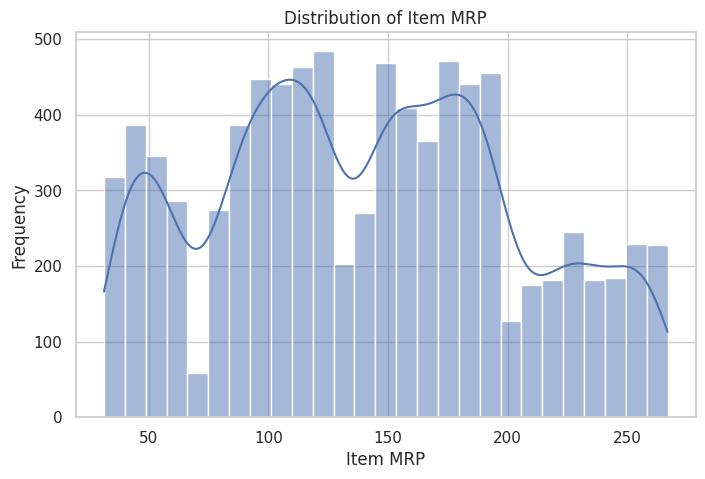

In [44]:
plt.figure(figsize=(8, 5))

sns.histplot(df_cleaned['Item_MRP'], kde=True)

plt.title('Distribution of Item MRP')
plt.xlabel('Item MRP')
plt.ylabel('Frequency')

plt.savefig('item_mrp_histogram.png', dpi=300)

plt.show()



### Boxplot of Item Outlet Sales

This boxplot displays the distribution and summary statistics of sales, helping us detect potential outliers.


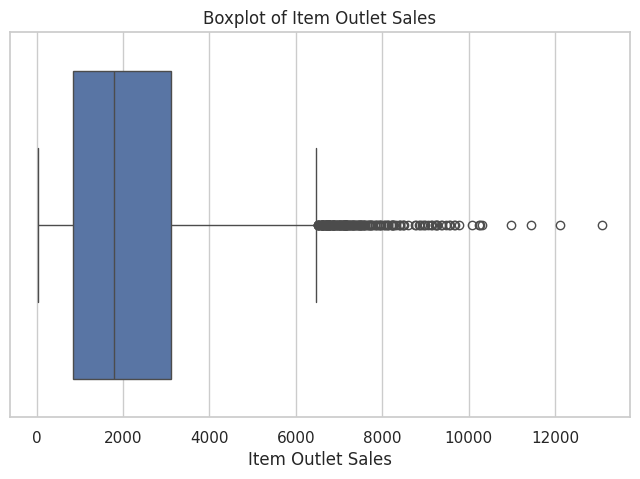

In [43]:
plt.figure(figsize=(8, 5))


sns.boxplot(x=df_cleaned['Item_Outlet_Sales'])


plt.title('Boxplot of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')


plt.savefig('sales_boxplot.png', dpi=300)


plt.show()

### Count of Outlet Sizes

This countplot shows the number of stores in each Outlet Size category (Small, Medium, High).


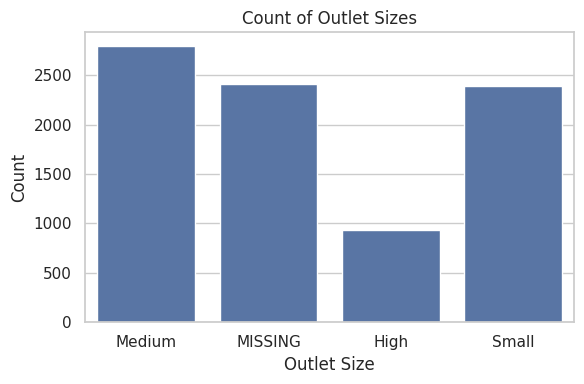

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(figsize=(6, 4))


sns.countplot(data=df, x='Outlet_Size', ax=ax)


ax.set_title('Count of Outlet Sizes')
ax.set_xlabel('Outlet Size')
ax.set_ylabel('Count')

fig.tight_layout()

fig.savefig('outlet_size_countplot.png', dpi=300)

plt.show()



### Correlation Heatmap

This heatmap visualizes the correlation between numerical features such as Item MRP, Item Weight, and Item Outlet Sales.


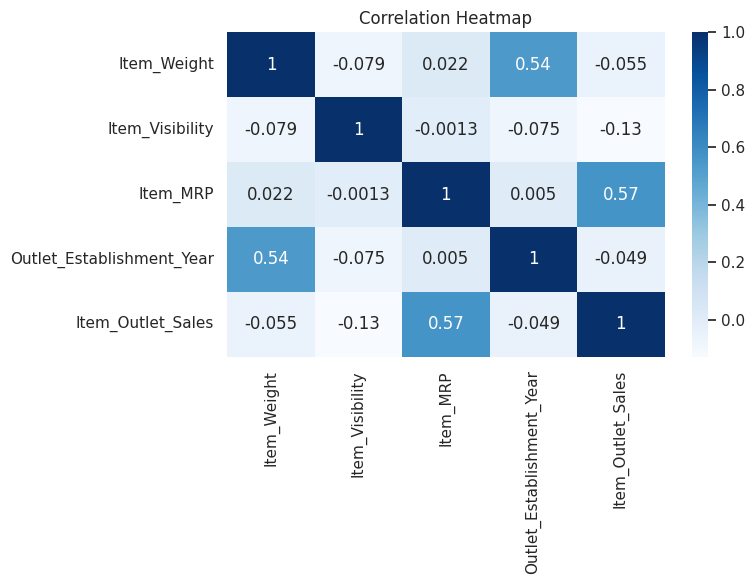

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(figsize=(8, 6))


corr = df.corr(numeric_only=True)


sns.heatmap(corr, annot=True, cmap='Blues', ax=ax)

ax.set_title('Correlation Heatmap')


fig.tight_layout()


fig.savefig('heatmap_plot.png', dpi=300)

# عرض الـ heatmap
plt.show()


Relationship Between Item Price (MRP) and Sales


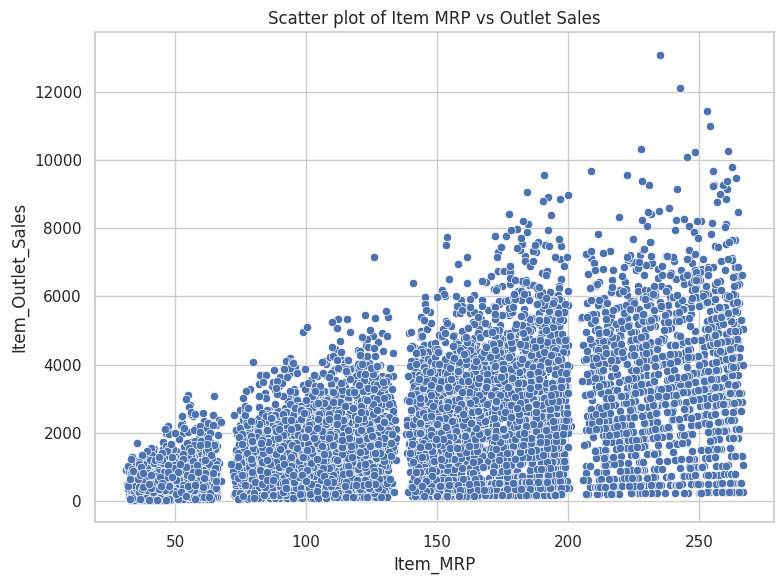

In [39]:
# In this scatter plot, we aim to visualize the relationship between the MRP (Maximum Retail Price) of items
# and their corresponding sales at different outlets.
# This will help us understand if there is a correlation between the price of an item and its sales performance.

import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df_cleaned, ax=ax)
ax.set_title('Scatter plot of Item MRP vs Outlet Sales')


fig.tight_layout()


fig.savefig('SavedPlot.png', dpi=300)

plt.show()
